In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

In [2]:
data2 = pd.read_csv('../newdata/task1_1_2.csv',encoding='gbk')

In [3]:
# Into a time series
data2['Date'] = pd.to_datetime(data2['Date'])
data2['day_name'] = [i.day_name() for i in data2['Date']]

In [4]:
newdata = data2.loc[:,['Date','day_name']]

def change_weekdays(data):
    return  '非工作日' if (data == 'Saturday' or data == 'Saturday') else '工作日'

def hour(data):
    return data.hour

newdata['tag'] = newdata['day_name'].apply(change_weekdays)
newdata['hour'] = newdata['Date'].apply(hour)

In [5]:
temp = newdata.groupby(by='tag')

no = temp.get_group('非工作日')
yes = temp.get_group('工作日')

no_count = no['hour'].value_counts()
yes_count = yes['hour'].value_counts()

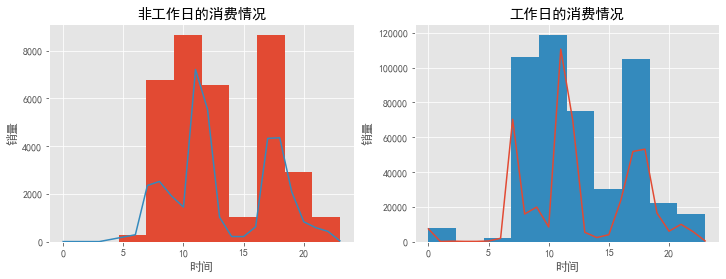

In [6]:
p = plt.figure(figsize=(12,4))

p.add_subplot(1,2,1)
plt.hist(no['hour'])
plt.plot(no_count.sort_index())
plt.title('非工作日的消费情况')
plt.xlabel('时间')
plt.ylabel('销量')

p.add_subplot(1,2,2)
plt.plot(yes_count.sort_index())
plt.title('工作日的消费情况')
plt.hist(yes['hour'])
plt.xlabel('时间')
q = plt.ylabel('销量')